In [0]:
from google.colab import drive 
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


***Importing required packages***

In [0]:
import matplotlib.pylab as plt
%matplotlib inline
import os,random
import glob
import cv2
import theano
import numpy as np
!pip install q keras==1.2.2


     |████████████████████████████████| 184kB 14.6MB/s 
  Created wheel for keras: filename=Keras-1.2.2-cp36-none-any.whl size=209603 sha256=faf41081aabe080c34f58c4d1bd37df05d61d3b20c33207d359f10a846b8becc
  Stored in directory: /root/.cache/pip/wheels/55/07/cf/b32db0a8d243b2fd6759d5d7cb650aa20670b2b740209cbf7e
Successfully built keras
ERROR: textgenrnn 1.4.1 has requirement keras>=2.1.5, but you'll have keras 1.2.2 which is incompatible.
ERROR: kapre 0.1.3.1 has requirement keras>=2.0.0, but you'll have keras 1.2.2 which is incompatible.
ERROR: fancyimpute 0.4.3 has requirement keras>=2.0.0, but you'll have keras 1.2.2 which is incompatible.
  Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1


In [0]:
os.environ["KERAS_BACKEND"] = "theano"
from keras.utils import np_utils
import keras.models as models
from keras.layers import Input,merge
from keras.layers.core import Reshape,Dense,Dropout,Activation,Flatten,MaxoutDense
from keras.layers.advanced_activations import LeakyReLU
from keras.activations import *
from keras.models import Sequential
from keras.layers.wrappers import TimeDistributed
from keras.layers.noise import GaussianNoise
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D, UpSampling2D
from keras.layers.recurrent import LSTM
from keras.regularizers import *
from keras.layers.normalization import *
from keras.optimizers import *
from keras.datasets import mnist
import pickle
import random, sys, keras
from keras.models import Model
from IPython import display
from keras.utils import np_utils
from tqdm import tqdm


Using Theano backend.


***Converting the Images to Grayscale***

In [0]:
%cd /content/gdrive/My\ Drive/train

/content/gdrive/My Drive/train


In [0]:
path='/content/gdrive/My Drive/train_gray'

for name in glob.glob('*.png'):
  img=cv2.imread(name)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  cv2.imwrite(os.path.join(path , name), gray)


In [0]:
%cd /content/gdrive/My\ Drive/train_label

/content/gdrive/My Drive/train_label


In [0]:
path='/content/gdrive/My Drive/train_label_gray'

for name in glob.glob('*.png'):
  img=cv2.imread(name)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  print(gray.shape)
  cv2.imwrite(os.path.join(path , name), gray)

(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)


***Converting the Images to a compressed file (.npz file)***

In [0]:
from os import listdir
from numpy import asarray
from numpy import vstack
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from numpy import savez_compressed

In [0]:

# load all images in a directory into memory
def load_images(path, size=(512,512)):
	train_list = list()
	# enumerate filenames in directory, assume all are images
	for filename in listdir(path):
		# load and resize the image
		pixels = load_img(path + filename, grayscale=True ,target_size=size)
		# convert to numpy array
		pixels = img_to_array(pixels)
		train_img = pixels[:, :]
		train_list.append(train_img)
	
	return [asarray(train_list)]
 
# dataset path
path = '/content/gdrive/My Drive/train_gray/'
# load dataset
[train_images] = load_images(path)
print('Loaded: ', train_images.shape)
# save as compressed numpy array
filename = 'train_gray.npz'
savez_compressed(filename,train_images)
print('Saved dataset: ', filename)

Loaded:  (20, 512, 512, 1)
Saved dataset:  train_gray.npz


In [0]:

# load all images in a directory into memory
def load_images(path, size=(512,512)):
	train_label_list = list()
	# enumerate filenames in directory, assume all are images
	for filename in listdir(path):
		# load and resize the image
		pixels = load_img(path + filename, grayscale=True, target_size=size)
		# convert to numpy array
		pixels = img_to_array(pixels)
		train_label_img = pixels[:, :]
		train_label_list.append(train_label_img)
	
	return [asarray(train_label_list)]
 
# dataset path
path = '/content/gdrive/My Drive/train_label_gray/'
# load dataset
[train_label_images] = load_images(path)
print('Loaded: ', train_label_images.shape)
# save as compressed numpy array
filename = 'train_label_gray.npz'
savez_compressed(filename,train_label_images)
print('Saved dataset: ', filename)


Loaded:  (20, 512, 512, 1)
Saved dataset:  train_label_gray.npz


In [0]:
# load all images in a directory into memory
def load_images(path, size=(32,32)):
	test_list = list()
	# enumerate filenames in directory, assume all are images
	for filename in listdir(path):
		# load and resize the image
		pixels = load_img(path + filename,grayscale=True, target_size=size)
		# convert to numpy array
		pixels = img_to_array(pixels)
		test_img = pixels[:, :]
		test_list.append(test_img)
	
	return [asarray(train_label_list)]
 
# dataset path
path = '/content/gdrive/My Drive/test_gray/'
# load dataset
[test_images] = load_images(path)
print('Loaded: ', test_images.shape)
# save as compressed numpy array
filename = 'test_gray.npz'
savez_compressed(filename,test_images)
print('Saved dataset: ', filename)


***Segmentation of Pancreas***

In [0]:
%cd /content/gdrive/My\ Drive


/content/gdrive/My Drive


In [0]:
# fix random seed for reproducibility
seed = 2000
np.random.seed(seed)

In [0]:
path2data='/content/gdrive/My Drive/'
h, w = 32,32


In [0]:
def make_trainable(net, val):
    net.trainable = val
    for l in net.layers:
        l.trainable = val
        
def get_stats(X):
    print ('array shape:', X.shape)
    print ('min: %s  max: %s  mean: %s  std: %s' %(np.min(X),np.max(X),np.mean(X),np.std(X)))
    print ('-'*50)
    
def preprocess(X,Y,params):
    
    #h=params['h']
    #w=params['w']
    norm_type=params['norm_type']
    
    
    if Y is None:
        Y=np.zero_like(X)
        
    # downsample    
    X = cv2.resize(X, (w, h), interpolation=cv2.INTER_CUBIC)
    Y = cv2.resize(Y, (w, h), interpolation=cv2.INTER_CUBIC)
    
    # reshape        
    X = np.transpose(X,(2,0,1))
    X=np.expand_dims(X,axis=1)
    Y = np.transpose(Y,(2,0,1))
    Y=np.expand_dims(Y,axis=1)
    

    X = X.astype('float32')
    if norm_type is 'minusplusone':
        # normalized to [-1,1]
        xmaxd2=np.max(X)/2
        X-=xmaxd2
        X/=xmaxd2## load data
    elif norm_type is 'zeromeanunitvar':
        X-=np.mean(X)
        X/=np.std(X)
    else:
        X/=np.max(X)
    return X,Y

def plot_loss(losses,BATCH_SIZE):
        display.clear_output(wait=True)
        display.display(plt.gcf())
        plt.figure(figsize=(10,8))
        
        #from operator import itemgetter 

        #res1 = dict(losses["d"].items()[len(losses["d"])//2:]) 
        #res2 = dict(losses["d"].items()[:len(losses["d"])//2])
        #res = list(map(itemgetter('d'), losses))  
        #res1 = res[:BATCH_SIZE]
        #res2 = res[BATCH_SIZE:]

        #plt.plot(res1, label='discriminitive loss real')
        #plt.plot(res2, label='discriminitive loss fake')
        plt.plot(losses["d"], label='discriminitive loss')
        plt.plot(losses["g"], label='generative loss')
        plt.legend()
        plt.show()
        
    
def plot_gen(n_ex=8,dim=(4,4), figsize=(10,10) ):
    noise = np.random.uniform(0,1,size=[n_ex,100])
    generated_images = generator.predict(noise)

    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0],dim[1],2*i+1)
        img = generated_images[i,0,:,:]
        label = generated_images[i,1,:,:]>.5
        plt.imshow(img,cmap='Greys_r')
        plt.axis('off')
        plt.subplot(dim[0],dim[1],2*i+2)
        plt.imshow(label,cmap='Greys_r')
        
    plt.tight_layout()
    plt.show()
    
def train_for_n(nb_epoch=4, plt_frq=50,BATCH_SIZE=32):

   #half_batch = int(BATCH_SIZE / 2)

    for e in tqdm(range(nb_epoch)):  
        
        # Make generative images
        image_batch = X_train[np.random.randint(0,X_train.shape[0],size=BATCH_SIZE),:,:,:]    
        noise_gen = np.random.uniform(-1,1,size=[BATCH_SIZE,100])
        generated_images = generator.predict(noise_gen)

        # Train discriminator on generated images
        X = np.concatenate((image_batch, generated_images))
        y = np.zeros([2*BATCH_SIZE,1])
        y[0:BATCH_SIZE,0] = 1
        #y[BATCH_SIZE:,0] = 1
        
        #make_trainable(discriminator,True)
        #d_loss_real = self.discriminator.train_on_batch(imgs, np.ones((half_batch, 1)))
        #d_loss_fake = self.discriminator.train_on_batch(gen_imgs, np.zeros((half_batch, 1)))
        
        d_loss  = discriminator.train_on_batch(X,y)
        losses["d"].append(d_loss) 
      
        # train Generator-Discriminator stack on input noise to non-generated output class
        noise_tr = np.random.uniform(-1,1,size=[BATCH_SIZE,100])
        y2 = np.zeros([BATCH_SIZE,1])
        y2[:,0] = 1
        
        #make_trainable(discriminator,False)
        g_loss = GAN.train_on_batch(noise_tr, y2 )
        losses["g"].append(g_loss)
        
        # Updates plots
        if e%plt_frq==plt_frq-1:
            plot_loss(losses,BATCH_SIZE)
            plot_gen()
            
def pick_large_contours(X,Y,threshold):
    k1=0
    #print(Y.shape[2])
    for k in range(Y.shape[2]):
        area=np.count_nonzero(Y[:,:,k])
        #print(area)
        if area>threshold:
            if k1==0:
                Xs=X[:,:,k]
                Ys=Y[:,:,k]
                Xs=np.expand_dims(Xs,axis=2)
                Ys=np.expand_dims(Ys,axis=2)
                #print(Xs,Ys)
            else:
                x1=X[:,:,k]
                x1=np.expand_dims(x1,axis=2)                
                Xs=np.append(Xs,x1,axis=2)
                y1=Y[:,:,k]
                y1=np.expand_dims(y1,axis=2)
                Ys=np.append(Ys,y1,axis=2)
                #print(Xs,Ys)
            k1=k1+1
    #print 'Xs:'  %Xs.shape      
    #print 'Ys:'  %Ys.shape      
    #print '-' *50
    return Xs,Ys
        
def initNormal(shape, name=None):
	return initializations.normal(shape, scale=0.02, name=name)    

def grays_to_RGB(img):
    # turn 2D grayscale image into grayscale RGB
    return np.dstack((img, img, img))


def image_with_mask(img, mask,color=(0,255,0)):
    #img=np.asarray(img,dtype='uint8')
    mask=np.asarray(mask,dtype='uint8') 
    if np.max(mask)==1:
        mask=mask*255

    # returns a copy of the image with edges of the mask added in red
    if len(img.shape)==2:	
        img_color = grays_to_RGB(img)
    else:
        img_color =img

    mask_edges = cv2.Canny(mask, 100, 200) > 0
    img_color[mask_edges, 0] = color[0]  # set channel 0 to bright red, green & blue channels to 0
    img_color[mask_edges, 1] = color[1]
    img_color[mask_edges, 2] = color[2]
    img_color=img_color#/float(np.max(img))
    plt.axis('off')
    return img_color


def plot_real(n_ex=8,dim=(4,4), figsize=(10,10) ):
    
    idx = np.random.randint(0,X_train.shape[0],n_ex)
    generated_images = X_train[idx,:,:,:]

    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0],dim[1],2*i+1)
        img = generated_images[i,0,:,:]
        plt.imshow(img,cmap='Greys_r')

        plt.subplot(dim[0],dim[1],2*i+2)
        label = generated_images[i,1,:,:]
        plt.imshow(label,cmap='Greys_r')
        
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [0]:

#X_train= np.load(path2data+'train_npy/pancreas_001.npy')
X_train= cv2.imread(path2data+'train/pancreas_001.png')
#X_train=tmp1['X']
#Y_train=tmp1['Y']
#Y_train = np.load(path2data+'train_label_npy/pancreas_001.npy')
Y_train = cv2.imread(path2data+'train_label/pancreas_001.png')
#X_train=np.append(X_train,tmp2['X'],axis=2)
#Y_train=np.append(Y_train,tmp2['Y'],axis=2)
get_stats(X_train)
get_stats(Y_train)

# pick large contours
X_train,Y_train=pick_large_contours(X_train,Y_train,20)

# preprocess
params={
    'h': h,
    'w': w,
    'norm_type': 'minusplusone',
}
X_train,Y_train = preprocess(X_train,Y_train,params)
get_stats(X_train)
get_stats(Y_train)


# concat X and Y
X_train=np.concatenate((X_train,Y_train),axis=1)
get_stats(X_train)


array shape: (512, 512, 3)
min: 0  max: 255  mean: 44.73686981201172  std: 36.35940898273779
--------------------------------------------------
array shape: (512, 512, 3)
min: 0  max: 255  mean: 3.434772491455078  std: 29.395056102225563
--------------------------------------------------
array shape: (3, 1, 32, 32)
min: -1.0  max: 1.0  mean: -0.60378355  std: 0.3229989
--------------------------------------------------
array shape: (3, 1, 32, 32)
min: 0  max: 255  mean: 3.6865234375  std: 30.273144136053382
--------------------------------------------------
array shape: (3, 2, 32, 32)
min: -1.0  max: 255.0  mean: 1.5413699  std: 21.514772
--------------------------------------------------


3
1


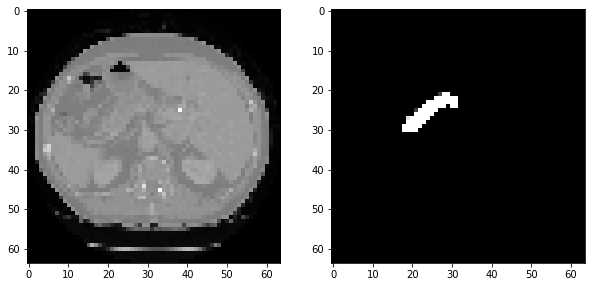

In [0]:
plt.figure(figsize=(10,10))
n1=np.random.randint(X_train.shape[0])
print(X_train.shape[0])
print(n1)
plt.subplot(121)
plt.imshow(X_train[n1,0],cmap='Greys_r')
plt.subplot(122)
plt.imshow(Y_train[n1,0],cmap='Greys_r')
plt.show()

In [0]:
lr = 0.0001
# optimizer
adam=SGD(lr=lr) #, beta_1=0.5

print('Generator Model')
a=8 
generator = Sequential()
generator.add(Dense(input_dim=100, output_dim=(128*a*a), init=initNormal))
generator.add(LeakyReLU(0.2))
generator.add(Reshape((128, a, a)))	
generator.add(UpSampling2D(size=(2, 2), dim_ordering='th'))
generator.add(Convolution2D(64, 5, 5, border_mode='same', dim_ordering='th'))
generator.add(LeakyReLU(0.2))	
generator.add(UpSampling2D(size=(2, 2),dim_ordering='th'))
generator.add(Convolution2D(2, 5, 5, border_mode='same', dim_ordering='th'))
generator.add(Activation('tanh'))
generator.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
generator.summary()

Generator Model
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 8192)          827392      dense_input_1[0][0]              
____________________________________________________________________________________________________
leakyrelu_1 (LeakyReLU)          (None, 8192)          0           dense_1[0][0]                    
____________________________________________________________________________________________________
reshape_1 (Reshape)              (None, 128, 8, 8)     0           leakyrelu_1[0][0]                
____________________________________________________________________________________________________
upsampling2d_1 (UpSampling2D)    (None, 128, 16, 16)   0           reshape_1[0][0]                  
___________________________________________________________________________

In [0]:
lr = 0.0001
# optimizer
adam1=SGD(lr=lr)#,beta_1=0.5
print('Discriminator Model')
n,c,h,w=X_train.shape
print( n, c, w ,h)
discriminator = Sequential()
discriminator.add(Convolution2D(64, 5, 5, border_mode='same', subsample=(2,2), input_shape=(c,w,h), dim_ordering='th'))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Convolution2D(32, 5, 5, border_mode='same', subsample=(2,2),dim_ordering='th'))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Flatten())
discriminator.add(Dense(1))
discriminator.add(Activation('sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer=adam1, metrics=['accuracy'])
discriminator.summary()

discriminator.trainable = False


Discriminator Model
3 2 32 32
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_3 (Convolution2D)  (None, 64, 16, 16)    3264        convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
leakyrelu_3 (LeakyReLU)          (None, 64, 16, 16)    0           convolution2d_3[0][0]            
____________________________________________________________________________________________________
convolution2d_4 (Convolution2D)  (None, 32, 8, 8)      51232       leakyrelu_3[0][0]                
____________________________________________________________________________________________________
leakyrelu_4 (LeakyReLU)          (None, 32, 8, 8)      0           convolution2d_4[0][0]            
_____________________________________________________________

In [0]:
# Freeze weights in the discriminator for stacked training
make_trainable(discriminator, False)

# Build stacked GAN model
gan_input = Input(shape=(100,))
H = generator(gan_input)
gan_V = discriminator(H)
GAN = Model(gan_input, gan_V)
GAN.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
GAN.summary()
#discriminator.trainable = True

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 100)           0                                            
____________________________________________________________________________________________________
sequential_1 (Sequential)        (None, 2, 32, 32)     1035458     input_1[0][0]                    
____________________________________________________________________________________________________
sequential_2 (Sequential)        (None, 1)             56545       sequential_1[1][0]               
Total params: 1,092,003
Trainable params: 1,035,458
Non-trainable params: 56,545
____________________________________________________________________________________________________


In [0]:
#Generate the fake images
print ('wait ...')
noise_gen = np.random.uniform(-1,1,size=[n,100])
get_stats(noise_gen)
generated_images = generator.predict(noise_gen)
get_stats(generated_images)
print ('completed!')

wait ...
array shape: (3, 100)
min: -0.9973888185116466  max: 0.9934204980169201  mean: -0.025541379181798197  std: 0.5936388204528336
--------------------------------------------------


WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


array shape: (3, 2, 32, 32)
min: -0.29805732  max: 0.30448103  mean: 0.023065418  std: 0.08225645
--------------------------------------------------
completed!


In [0]:
# Pre-train the discriminator network 
print('wait ...')
get_stats(X_train)
get_stats(generated_images)
X = np.concatenate((X_train, generated_images))

n = X_train.shape[0]
y = np.zeros([2*n,1])
y[:n,0] = 1 
#np.random.rand(n)/2+.7
#y[n:,0] = 1

make_trainable(discriminator,True)
discriminator.fit(X,y, nb_epoch=10, batch_size=8)
y_hat = discriminator.predict(X)
print ('completed!')

wait ...
array shape: (3, 2, 32, 32)
min: -1.0  max: 255.0  mean: 1.5413699  std: 21.514772
--------------------------------------------------
array shape: (3, 2, 32, 32)
min: -0.29805732  max: 0.30448103  mean: 0.023065418  std: 0.08225645
--------------------------------------------------
Epoch 1/10
6/6 [==============================] - 0s - loss: 1.8591 - acc: 0.0000e+00
Epoch 2/10
6/6 [==============================] - 0s - loss: 0.5602 - acc: 0.5000
Epoch 3/10
6/6 [==============================] - 0s - loss: 0.4188 - acc: 0.5000
Epoch 4/10
6/6 [==============================] - 0s - loss: 0.3947 - acc: 0.5000
Epoch 5/10
6/6 [==============================] - 0s - loss: 0.3835 - acc: 0.5000
Epoch 6/10
6/6 [==============================] - 0s - loss: 0.3770 - acc: 0.5000
Epoch 7/10
6/6 [==============================] - 0s - loss: 0.3726 - acc: 0.5000
Epoch 8/10
6/6 [==============================] - 0s - loss: 0.3696 - acc: 0.5000
Epoch 9/10
6/6 [==============================] 

In [0]:
#Evaluate discriminator
print ('wait ...')
y_hat_idx = np.argmax(y_hat,axis=1)
y_idx = np.argmax(y,axis=1)
diff = y_idx-y_hat_idx
n_tot = y.shape[0]
n_rig = (diff==0).sum()
acc = n_rig*100.0/n_tot-1
print ("Accuracy: %0.02f pct (%d of %d) right"%(acc, n_rig, n_tot))

wait ...
Accuracy: 99.00 pct (6 of 6) right


In [0]:
# set up loss storage vector
 losses= {"d":[], "g":[]}

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

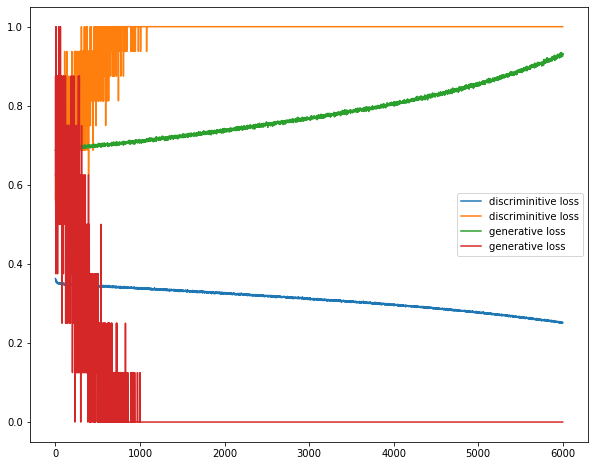

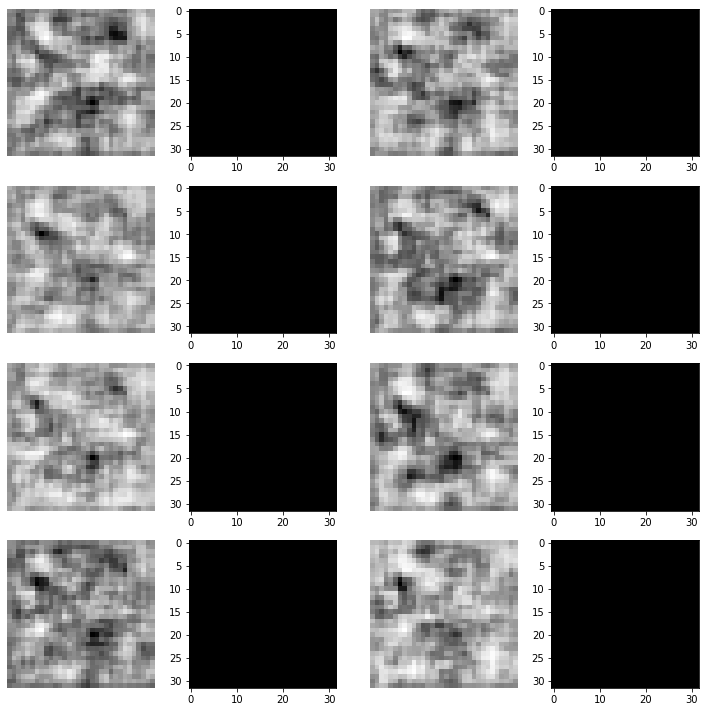

100%|██████████| 6000/6000 [40:30<00:00,  2.47it/s]


In [0]:
train_for_n(nb_epoch=6000, plt_frq=1000,BATCH_SIZE=8)

In [0]:
weightfolder='/content/gdrive/My Drive/weights'
if  not os.path.exists(weightfolder):
    os.makedirs(weightfolder)
    print ('weights folder created')

# path to weights
path2gen_weights=weightfolder+"/gen_weights.hdf5"
path2dis_weights=weightfolder+"/dis_weights.hdf5"
generator.save_weights(path2gen_weights)
discriminator.save_weights(path2dis_weights)
print ('weights saved')

weights saved


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

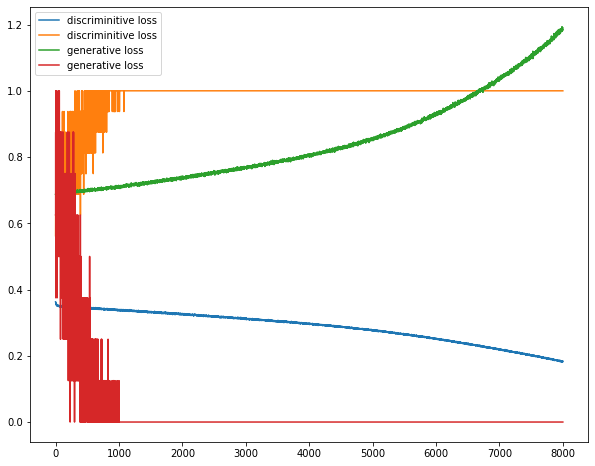

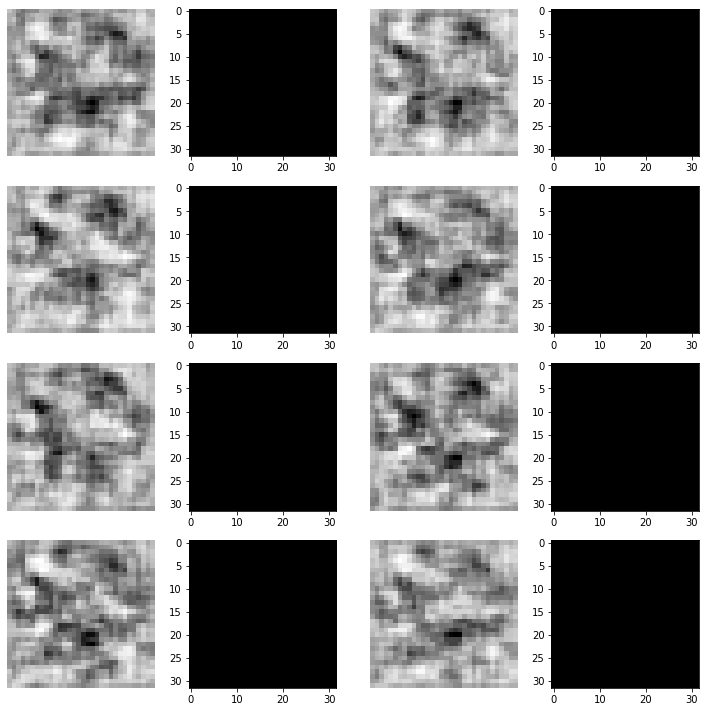

100%|██████████| 2000/2000 [13:40<00:00,  2.44it/s]


In [0]:
adam.lr.set_value(1e-5)
adam.lr.set_value(1e-4)
train_for_n(nb_epoch=2000, plt_frq=500,BATCH_SIZE=8)

In [0]:
weightfolder='/content/gdrive/My Drive/weights'
if  not os.path.exists(weightfolder):
    os.makedirs(weightfolder)
    print ('weights folder created')

# path to weights
path2gen_weights=weightfolder+"/gen_weights.hdf5"
path2dis_weights=weightfolder+"/dis_weights.hdf5"
generator.save_weights(path2gen_weights)
discriminator.save_weights(path2dis_weights)
print ('weights saved.')

In [0]:
adam.lr.set_value(1e-6)
adam.lr.set_value(1e-5)
train_for_n(nb_epoch=2000, plt_frq=400,BATCH_SIZE=8)

In [0]:
weightfolder='/content/gdrive/My Drive/weights'
if  not os.path.exists(weightfolder):
    os.makedirs(weightfolder)
    print 'weights folder created'

# path to weights
path2gen_weights=weightfolder+"/gen_weights.hdf5"
path2dis_weights=weightfolder+"/dis_weights.hdf5"
generator.save_weights(path2gen_weights)
discriminator.save_weights(path2dis_weights)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

array shape: (16, 2, 32, 32)
min: -0.9995808  max: 0.99999994  mean: 0.009683413  std: 0.20078272
--------------------------------------------------


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


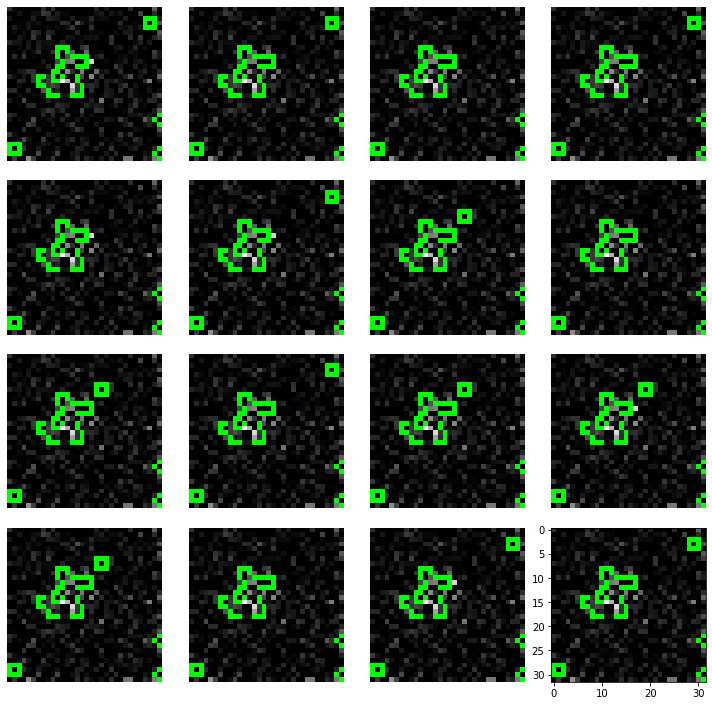

In [0]:
nn=16
noise = np.random.uniform(0,1,size=[nn,100])
generated_images = generator.predict(noise)
get_stats(generated_images)
plt.figure(figsize=(10,10))
for k in range(nn):
    img=generated_images[k,0]
    #img=(img-np.min(img))*255
    mask=generated_images[k,1]>0.5
    img=image_with_mask(img,mask,(-1,1,-1))
    plt.subplot(4,4,k+1)
    plt.imshow(img)
plt.tight_layout()
plt.show()

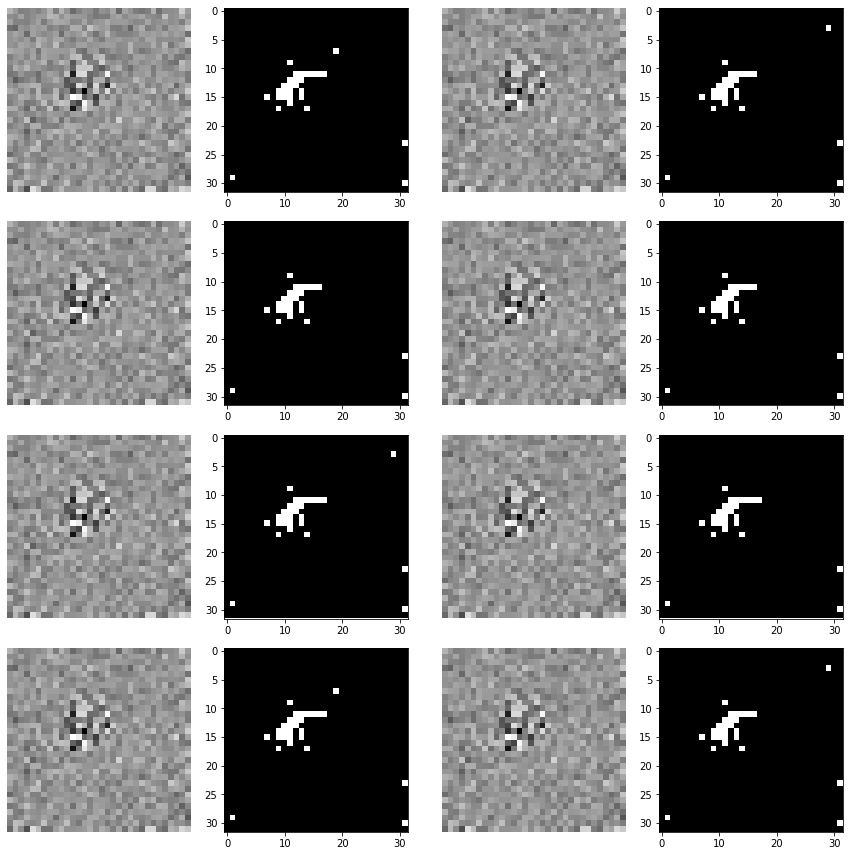

In [0]:
plot_gen(8,(4,4),(12,12))

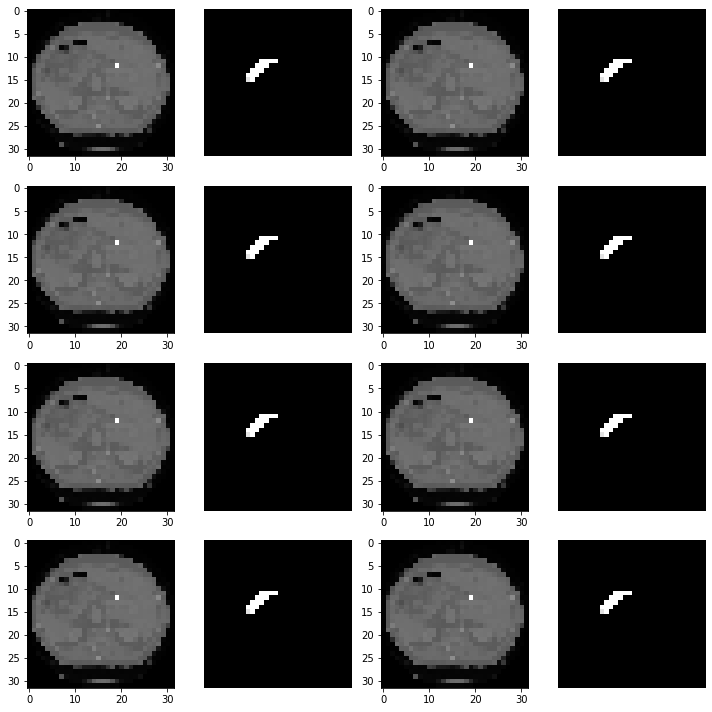

In [0]:
plot_real()
